## variability of data

In [17]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# import data
data = pd.read_pickle('../data/cleaned_train.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### random sampling

In [14]:
sample1 = data.sample(n=100,random_state=24)
sample2 = data.sample(n=100,random_state=36)
sample3 = data.sample(n=100,random_state=42)
sample4 = data.sample(n=100,random_state=64)

sample1.shape,sample2.shape,sample3.shape,sample4.shape

((100, 80), (100, 80), (100, 80), (100, 80))

In [16]:
sample1.index,sample2.index,sample3.index,sample4.index

(Int64Index([1001,  315,  519, 1364,  538, 1239, 1392,  222, 1074,  826,   91,
             1445, 1143,  923,  345,  118,  658, 1026, 1328, 1183, 1221, 1257,
             1333, 1038, 1066,  588, 1219,  833,  549, 1355, 1050,  440,  789,
              321,  600,  550, 1197, 1054, 1339,  536,  780, 1125,  718,  693,
             1394, 1446,   20,  606,  323,  437, 1346, 1062,  401, 1396, 1409,
             1113,  873,  624,  259, 1402, 1308,  343, 1301,  165,  269,  684,
             1217,  198,  395,  450, 1405, 1295,  682, 1348,  898,    4,  661,
              922,  318, 1381,  237, 1089, 1435, 1259,  502, 1298,  806,  757,
               16, 1294,   32, 1056,  245,  276,  566,   69,  399, 1441, 1432,
              137],
            dtype='int64', name='Id'),
 Int64Index([1058, 1392,  292,  227,  623,  515, 1384,  525,  146,  210,  584,
              586,  734, 1070, 1201,  537, 1314, 1114,  689,  453,  455,  310,
              831,  493, 1129, 1350,  940,   43,   81,  757, 1018,   90,

In [48]:
# central tendency
# trim mean is special central value which eliminate very small and large
# data from sample and calculate mean
# median is special moment of trim mean, that eliminate all other data point
# and take middle points
samples = [sample1,sample2,sample3,sample4]
means = [np.mean(sample['SalePrice']) for sample in samples]
medians = [np.median(sample['SalePrice']) for sample in samples]
trim_means = [ss.trim_mean(sample['SalePrice'],0.1) for sample in samples]

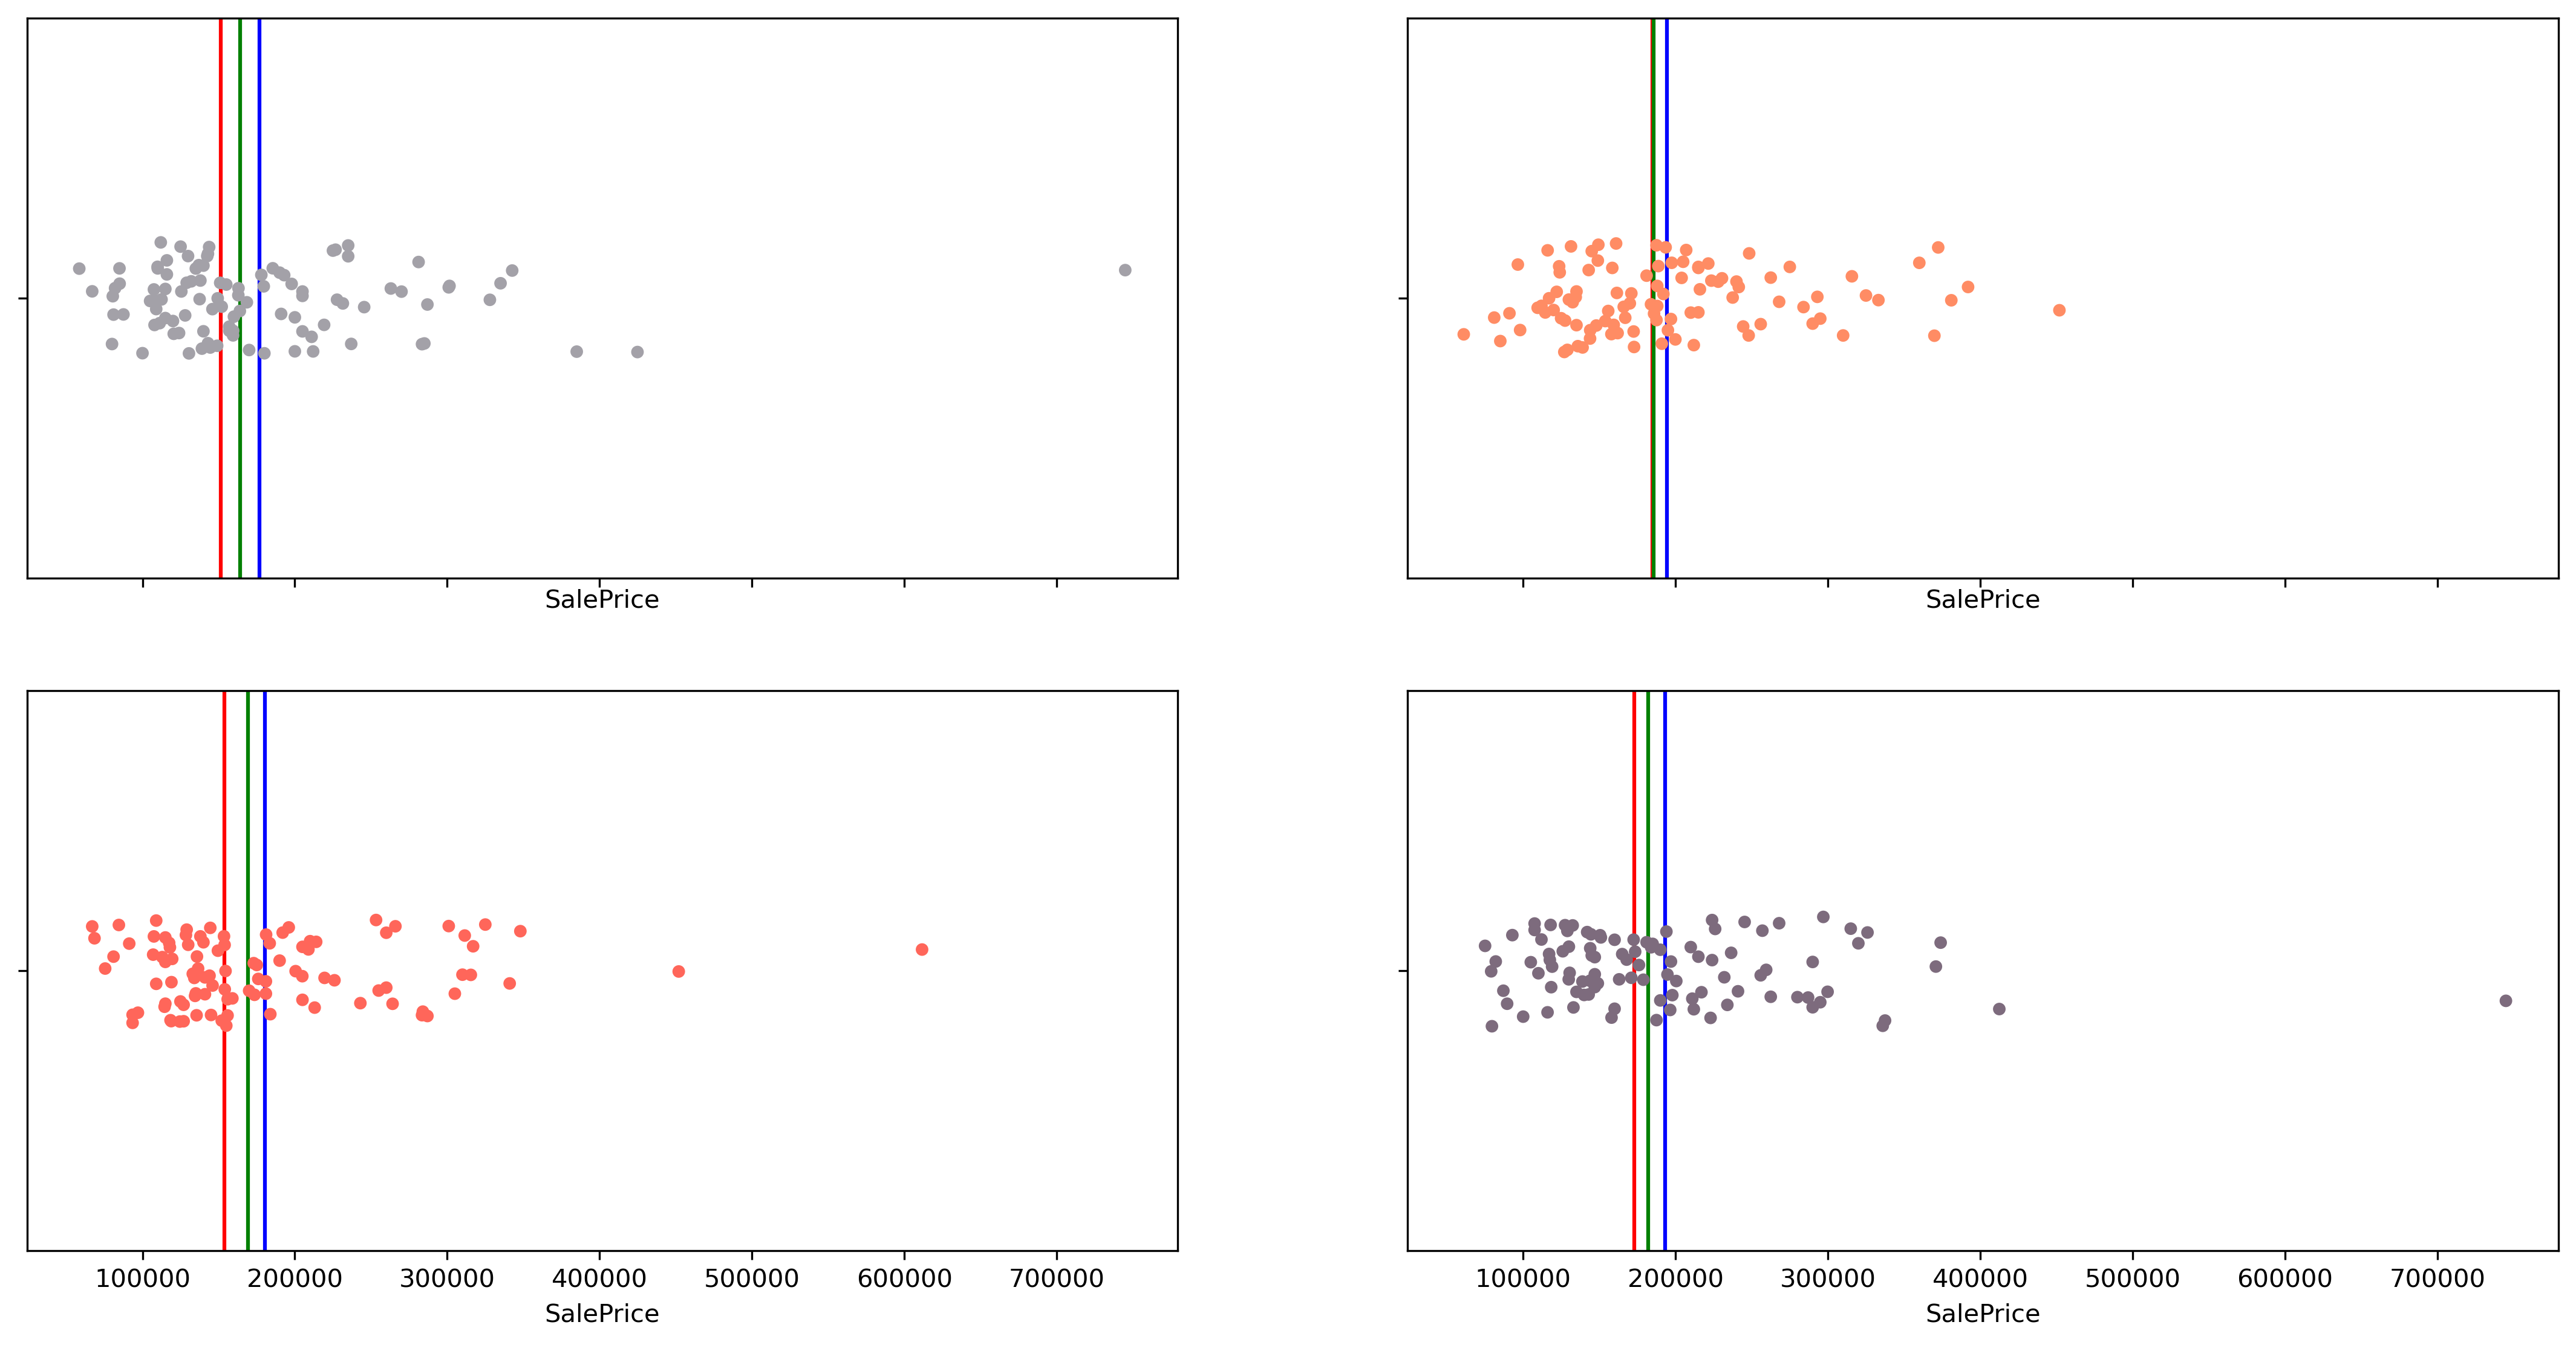

In [49]:
colors = ['#A3A1A8','#FF8C64','#FF665A','#7D6B7D']
fig,axes = plt.subplots(nrows=2,ncols=2,sharex='all',figsize=[18,9],dpi=300)
ax = axes.ravel()

for i in range(len(ax)):
    sns.stripplot(x=samples[i]['SalePrice'],color=colors[i],ax=ax[i])
    ax[i].axvline(means[i],color='b')
    ax[i].axvline(medians[i],color='r')
    ax[i].axvline(trim_means[i],color='g')

plt.show()

# in every sample mean larger than median
# there are few points clearly locate separately from central
# trim mean close to median